In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']='SimHei' #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 导入数据
data = pd.read_excel('调研报告.xlsx')
X = np.array(data['月份']).reshape(-1,1)
y1 = data['需求量']
y2 = data['供应量']
y = np.array(y1-y2).reshape(-1,1)
data['差量'] = y
data

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,月份,需求量,供应量,差量
0,1,600000,540000,60000
1,2,630500,592500,38000
2,3,652831,630933,21898
3,4,661000,645000,16000
4,5,652831,630933,21898
5,6,630500,592500,38000
6,7,600000,540000,60000
7,8,569500,487500,82000
8,9,547169,449067,98102
9,10,639000,435000,204000


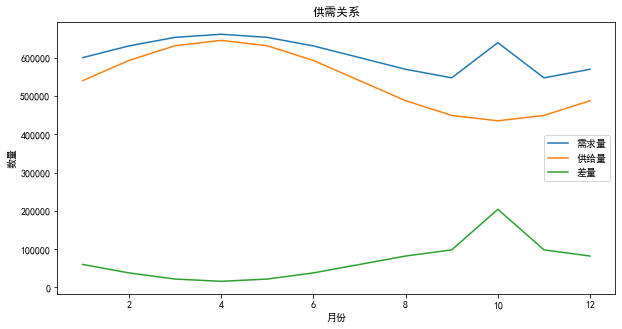

In [5]:
# 绘图
fig = plt.figure(figsize=(10,5))
plt.plot(X,y1,label='需求量')
plt.plot(X,y2,label='供给量')
plt.plot(X,y,label='差量')
plt.xlabel('月份')
plt.ylabel('数量')
plt.title('供需关系')
plt.legend()
if not os.path.exists('需求变化图.jpg'):
    plt.savefig('需求变化图.jpg')
plt.show()

In [6]:
# 机器学习，线性绘图
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
# 评估
theta0 = lr.intercept_[0]
theta1 = lr.coef_[0][0]
print(theta0,theta1)

7641.333333333336 9337.230769230768


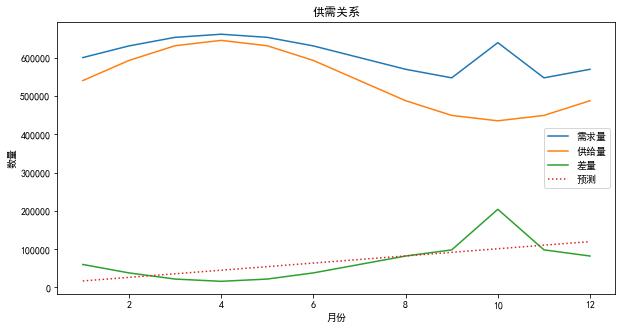

In [7]:
# 预测
y_predict = lr.predict(X)
data['预测'] = y_predict
if not os.path.exists('分析数据.xlsx'):
    data.to_excel('分析数据.xlsx')
# 绘图
fig = plt.figure(figsize=(10,5))
plt.plot(X,y1,label='需求量')
plt.plot(X,y2,label='供给量')
plt.plot(X,y,label='差量')
plt.plot(X,y_predict,label='预测',linestyle=':')
plt.xlabel('月份')
plt.ylabel('数量')
plt.title('供需关系')
plt.legend()
if not os.path.exists('需求预测图.jpg'):
    plt.savefig('需求预测图.jpg')
plt.show()

In [8]:
data = pd.read_excel('调研报告.xlsx', sheet_name='各个城市市场占比',encode='utf8')
data = data.drop(['序号'],axis=1)
# data['需求占比%'] = data['需求占比%'].apply(lambda x: x*10)
city_data = [list(z) for z in zip(data['城市'], data['需求占比%'])]
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,城市,需求占比%
0,广州,8.05
1,北京,9.96
2,上海,9.96
3,香港,2.05
4,天津,3.01


In [9]:
from pyecharts import options as opts
from pyecharts.globals import ChartType
from pyecharts.charts import Geo

china_map = Geo()
china_map.add_schema(maptype="china")
china_map.add("全国市场需求",
              city_data,
              type_=ChartType.EFFECT_SCATTER
             )
china_map.set_series_opts(label_opts=opts.LabelOpts(is_show=False,color='auto'))
china_map.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(max_=10),
    title_opts=opts.TitleOpts())
if not os.path.exists('全国市场需求1.html'):
    china_map.render('全国市场需求.html')
    
# from pyecharts.render import make_snapshot
# from snapshot_pyppeteer import snapshot
# import nest_asyncio
# nest_asyncio.apply()
# make_snapshot(snapshot,'全国市场需求.html','全国市场需求.png',notebookte=True)

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


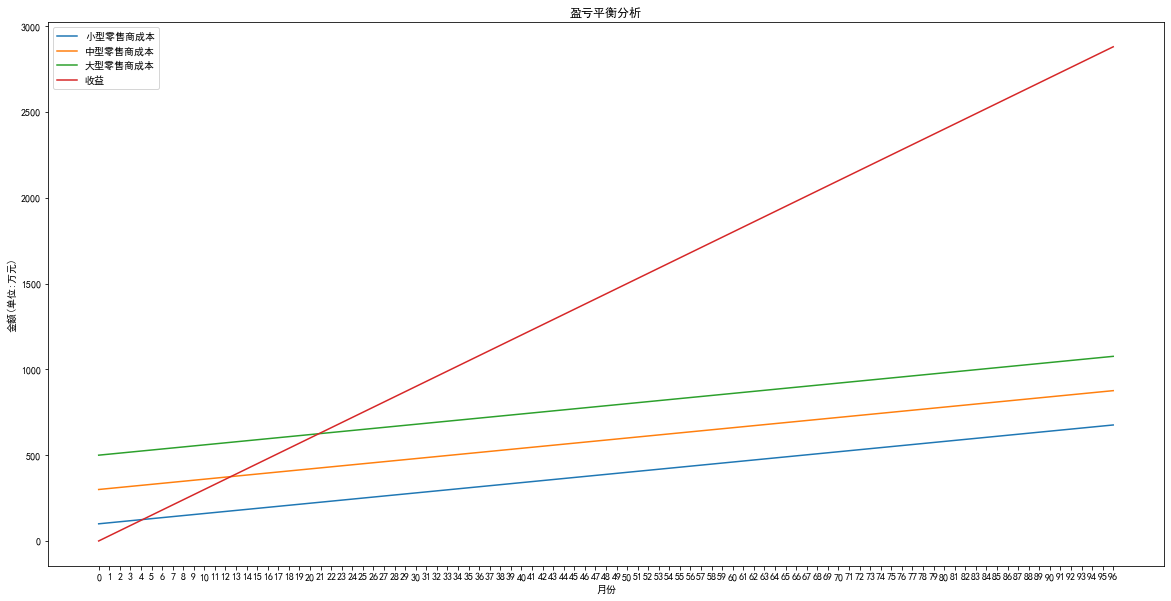

In [25]:
# 盈亏平衡分析
X = np.arange(0,97)
y1 = list(map(lambda x :6*x+100,X))
y2 = list(map(lambda x :6*x+300,X))
y3 = list(map(lambda x :6*x+500,X))
y_profit = list(map(lambda x:300*0.1*x,X))
fig = plt.figure(figsize=(20,10))
plt.xticks(X)
plt.plot(X,y1,label='小型零售商成本')
plt.plot(X,y2,label='中型零售商成本')
plt.plot(X,y3,label='大型零售商成本')
plt.plot(X,y_profit,label='收益')
plt.title('盈亏平衡分析')
plt.xlabel('月份')
plt.ylabel('金额(单位:万元)')
plt.legend()
if not os.path.exists('盈亏平衡.png'):
    plt.savefig('盈亏平衡.png')
plt.show()